# Introducción al Deep Learning: fundamentos, arquitecturas y aplicaciones
## David de la Rosa de la Rosa (drrosa@ujaen.es)
## Manuel Germán Morales (mgerman@ujaen.es)

### Manejo de tensores con Pytorch


In [ ]:
!pip install requests pytorch-lightning torchmetrics torchviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.9/800.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=7168462e1d0456ca7178234db35dafb52cc8659903b5df57f20dfbd966738da1
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


Importamos librerías

In [ ]:
import numpy as np
import pandas as pd
import zipfile
import requests
import io
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt

# **Manejo de tensores**

Un tensor (en informática) se define como una matriz multidimensional que contiene elementos de un mismo tipo. Pytorch usa esta estructura de datos como entrada y salida de sus diferentes elementos, por lo que deberemos adaptar cualquier otra estructura auxiliar a un tensor como último paso en nuestro preprocesamiento.

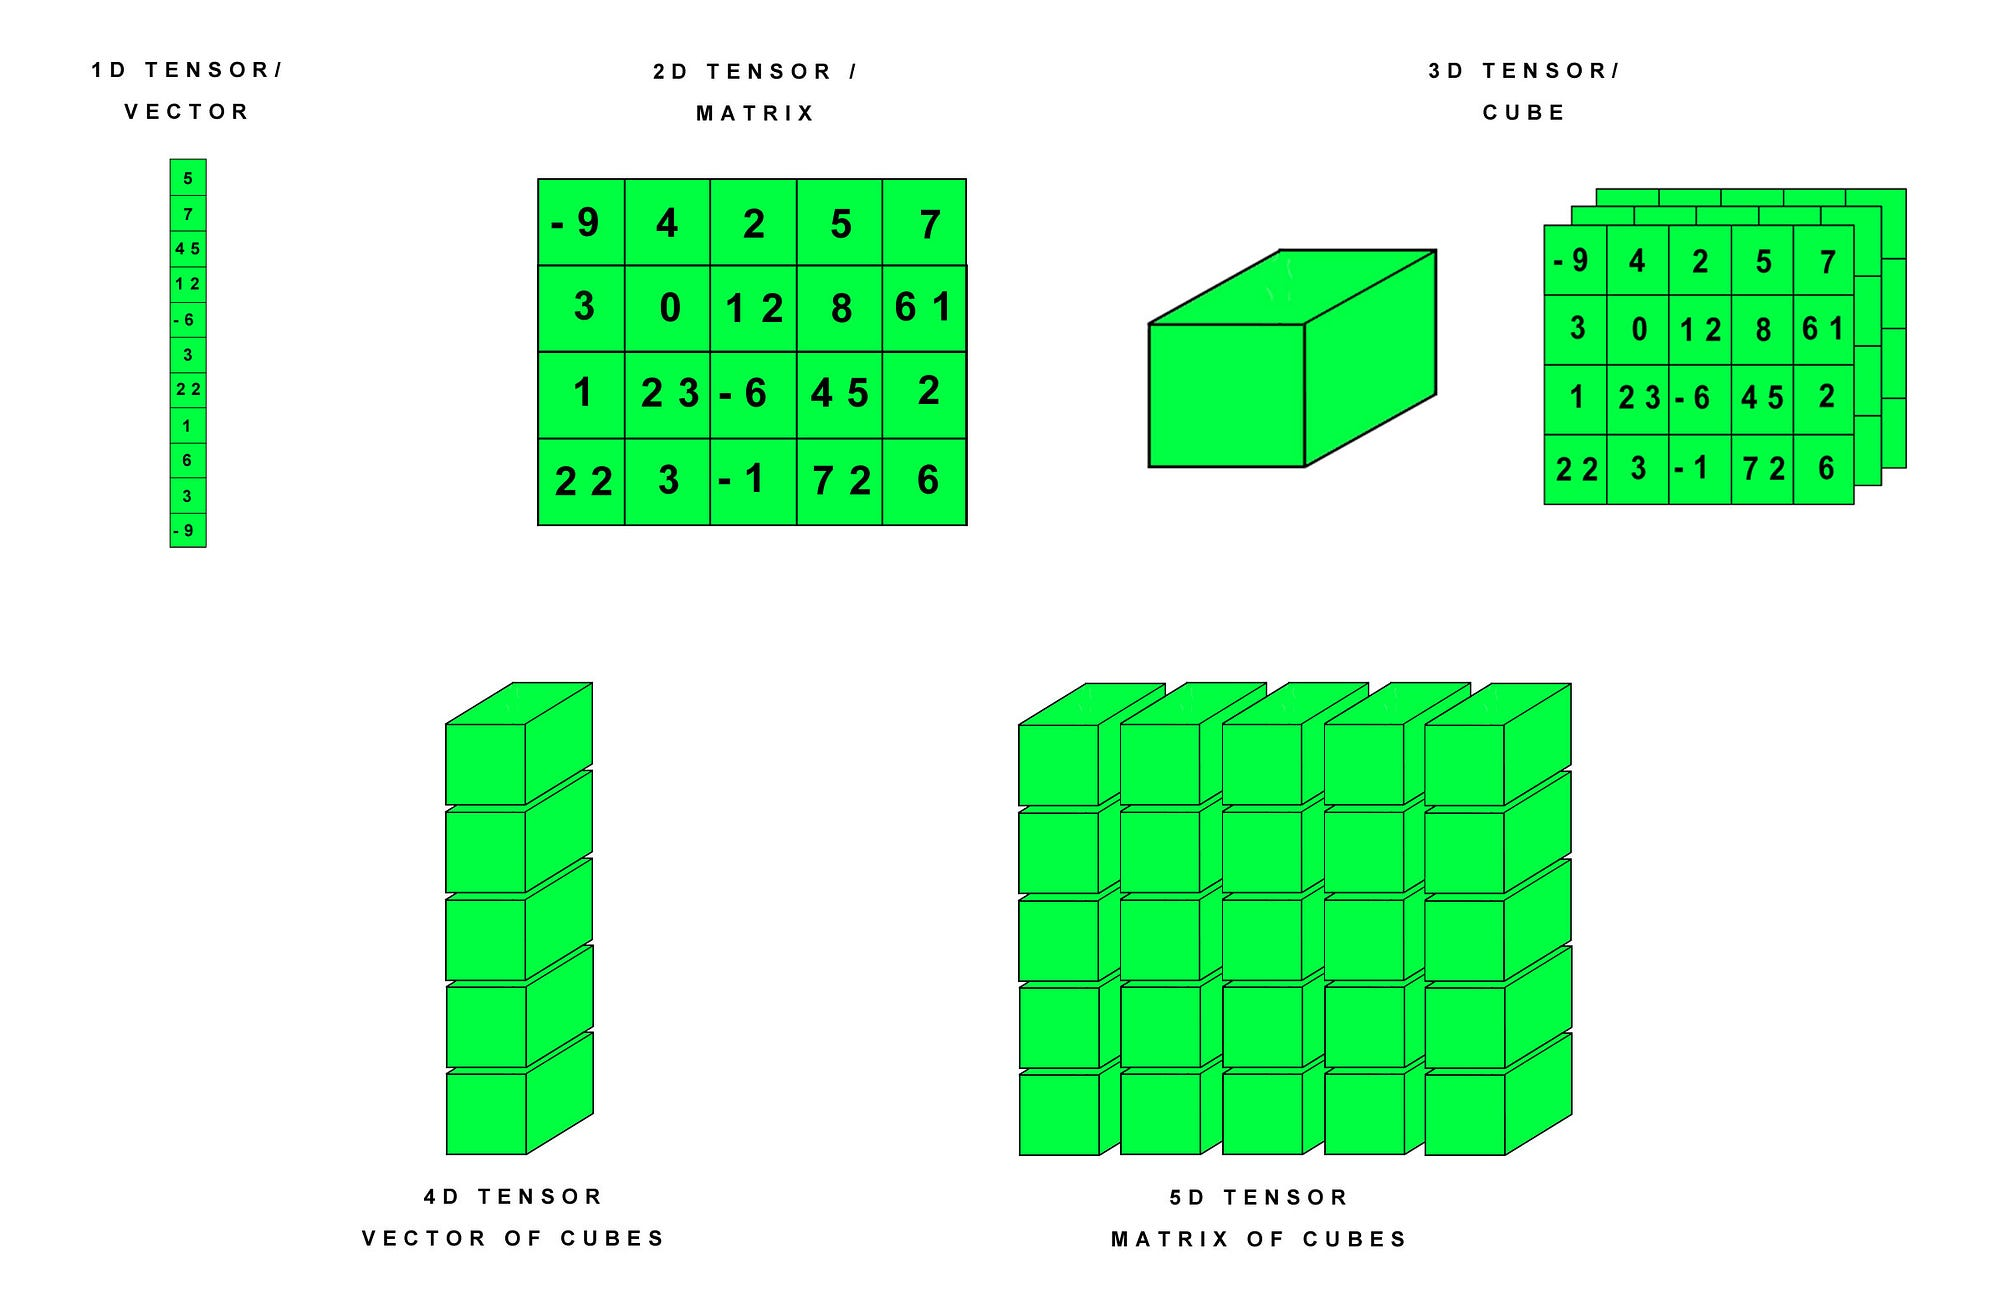

En la imagen anterior se pueden visualizar tensores con diferentes dimensiones. Por ejemplo:
  - El tensor 1D posee un tamaño de dimensión de 11
  - El tamaño de las dimensiones del tensor 2D es (4, 5)
  - El tamaño de las dimensiones del tensor 3D es (3, 4, 5)
  - El tamaño de las dimensiones del tensor 4D es (5, 3, 4, 5)
  - El tamaño de las dimensiones del tensor 5D es (5, 5, 3, 4, 5)


## Creación de tensores y acceso a sus elementos

La función `torch.Tensor` reserva la memoria necesaria para el tensor a crear. Existen diferentes formas de crear un tensor con valores iniciales:

* `torch.zeros`: Crea un tensor inicializado completamente a 0
* `torch.ones`: Crea un tensor inicializado completamente a 1
* `torch.rand`: Crea un tensor mediante una distribución uniforme $U(0,1)$.
* `torch.randn`: Crea un tensor mediante una distribución normal $N(0,1)$.
* `torch.arange`: Crea un tensor con una lista de valores que van desde $n$ hasta $m$ ($N,N+1,N+2,...,M$), similar a la función `range(n,m+1)` de Python.
* `torch.Tensor`: Crea un tensor a partir de una lista de valores definida por el usuario.
* `torch.from_numpy`: Crea un tensor a partir de un array de la librería `numpy`.

Usaremos `torch.rand` para la creación de nuestro tensor.

Especificamos primero la semilla aleatoria que usará Pytorch en sus operaciones.

In [ ]:
torch.manual_seed(42)

Creamos un tensor 2D usando `torch.rand()`. Especificaremos como parámetros de la función el tamaño de cada dimensión.

In [ ]:
myTensor = torch.rand(32, 6) * 10
myTensor

tensor([[8.8227, 9.1500, 3.8286, 9.5931, 3.9045, 6.0090],
        [2.5657, 7.9364, 9.4077, 1.3319, 9.3460, 5.9358],
        [8.6940, 5.6772, 7.4109, 4.2940, 8.8544, 5.7390],
        [2.6658, 6.2745, 2.6963, 4.4136, 2.9692, 8.3169],
        [1.0531, 2.6949, 3.5881, 1.9936, 5.4719, 0.0616],
        [9.5155, 0.7527, 8.8601, 5.8321, 3.3765, 8.0898],
        [5.7793, 9.0398, 5.5466, 3.4231, 6.3434, 3.6441],
        [7.1043, 9.4641, 7.8903, 2.8141, 7.8863, 5.8946],
        [7.5392, 1.9525, 0.0505, 3.0682, 1.1649, 9.1027],
        [6.4402, 7.0711, 6.5813, 4.9130, 8.9130, 1.4474],
        [5.3148, 1.5873, 6.5418, 3.2781, 6.5321, 3.9583],
        [9.1470, 2.0365, 2.0180, 2.0178, 9.4972, 6.6663],
        [9.8113, 0.8736, 0.0406, 1.0882, 1.6366, 7.0252],
        [6.7904, 9.1546, 2.4179, 1.5914, 7.6529, 2.9790],
        [8.0346, 3.8135, 7.8602, 1.1152, 2.4768, 6.5244],
        [6.0570, 3.7252, 7.9803, 8.3990, 1.3741, 2.3307],
        [9.5783, 3.3128, 3.2274, 0.1620, 2.1366, 6.2490],
        [4.340

Podemos obtener información sobre la dimensiones y tamaño del vector usando el atributo `shape` o el método `size()`.

In [ ]:
shape = myTensor.shape
print("Dims: ", len(shape))
print("Shape:", shape)

size = myTensor.size()
print("Size:", size)

dim1, dim2 = size
print("Size:", dim1, dim2)

Dims:  2
Shape: torch.Size([32, 6])
Size: torch.Size([32, 6])
Size: 32 6


También, podemos acceder a los elementos de un tensor usando el operador corchete (`[]`). El primer operador se corresponderá con la primera dimensión del tensor, el segundo con la segunda y así sucesivamente.

En un tensor 2D el primer operador permitirá obtener filas de la matriz y el segundo, el valor de la columna deseado (segunda dimensión).

In [ ]:
myTensor[0]

tensor([8.8227, 9.1500, 3.8286, 9.5931, 3.9045, 6.0090])

In [ ]:
myTensor[0][0]

tensor(8.8227)

Podemos hacer uso de rangos (`[a:b, c:d, ...]`) para crear trozos (_slices_) de tensores.
En un rango, se seleccionan todos los elementos cuyos índices se encuentren en el intervalo `[a, b-1]`.

In [ ]:
# Obtener los 5 primeros ejemplos del tensor (dimensión 1)
myTensor[:5] # Equivale a myTensor[:5, :]

tensor([[8.8227, 9.1500, 3.8286, 9.5931, 3.9045, 6.0090],
        [2.5657, 7.9364, 9.4077, 1.3319, 9.3460, 5.9358],
        [8.6940, 5.6772, 7.4109, 4.2940, 8.8544, 5.7390],
        [2.6658, 6.2745, 2.6963, 4.4136, 2.9692, 8.3169],
        [1.0531, 2.6949, 3.5881, 1.9936, 5.4719, 0.0616]])

In [ ]:
# Obtener las tres primeras características (dimensión 2) de los primeros 5 ejemplos del tensor (dimensión 1)
myTensor[:5, :3]

tensor([[8.8227, 9.1500, 3.8286],
        [2.5657, 7.9364, 9.4077],
        [8.6940, 5.6772, 7.4109],
        [2.6658, 6.2745, 2.6963],
        [1.0531, 2.6949, 3.5881]])

Los números negativos se pueden usar para seleccionar elementos tomando como referencia el final del tensor. Usar un rango `[-a:-b]` equivale a realizar `[-a+tam_dim:-b+tam_dim]` (siendo `tam_dim` el tamaño de la dimensión).

In [ ]:
# Obtener todas las características de los últimos 5 ejemplos
myTensor[-5:] # Equivale a myTensor[27:32, :]

tensor([[5.6432, 0.5937, 7.0989, 4.2499, 2.7094, 9.2947],
        [6.1147, 2.2336, 2.4693, 4.7612, 7.7918, 3.7223],
        [2.1471, 3.2878, 1.2646, 6.7832, 8.8702, 0.2928],
        [6.1613, 7.5830, 5.9066, 3.2194, 7.6097, 7.6276],
        [6.8696, 4.1214, 3.6760, 5.5349, 4.1167, 3.5100]])

Podemos también modificar valores de las diferentes dimensiones del tensor usando rangos. En este caso, fijaremos el valor de las posiciones 3 y 4 de cada instancia del lote a -10.

In [ ]:
myTensor[:, 3:5] = -10
myTensor

tensor([[  8.8227,   9.1500,   3.8286, -10.0000, -10.0000,   6.0090],
        [  2.5657,   7.9364,   9.4077, -10.0000, -10.0000,   5.9358],
        [  8.6940,   5.6772,   7.4109, -10.0000, -10.0000,   5.7390],
        [  2.6658,   6.2745,   2.6963, -10.0000, -10.0000,   8.3169],
        [  1.0531,   2.6949,   3.5881, -10.0000, -10.0000,   0.0616],
        [  9.5155,   0.7527,   8.8601, -10.0000, -10.0000,   8.0898],
        [  5.7793,   9.0398,   5.5466, -10.0000, -10.0000,   3.6441],
        [  7.1043,   9.4641,   7.8903, -10.0000, -10.0000,   5.8946],
        [  7.5392,   1.9525,   0.0505, -10.0000, -10.0000,   9.1027],
        [  6.4402,   7.0711,   6.5813, -10.0000, -10.0000,   1.4474],
        [  5.3148,   1.5873,   6.5418, -10.0000, -10.0000,   3.9583],
        [  9.1470,   2.0365,   2.0180, -10.0000, -10.0000,   6.6663],
        [  9.8113,   0.8736,   0.0406, -10.0000, -10.0000,   7.0252],
        [  6.7904,   9.1546,   2.4179, -10.0000, -10.0000,   2.9790],
        [  8.0346,  

## Operaciones con tensores

Podemos realizar operaciones con tensores al igual que con cualquier tipo de dato básico existente en Python, comprobando previamente que la dimensionalidad entre los operandos sea la misma.

Las operaciones de tensores con escalares se pueden realizar directamente, aplicando directamente la operación a cada elemento del tensor.

In [ ]:
myTensor2 = torch.rand(30, 6) * 20
badAddedTensor = myTensor + myTensor2
myTensor2

RuntimeError: ignored

In [ ]:
myTensor2 = torch.rand(32, 6) * 20
addedTensor = myTensor + myTensor2
myTensor2

tensor([[ 4.1777,  8.7019,  2.6282,  5.1758, 11.8110, 15.4454],
        [18.2837,  0.8189, 16.6862,  2.9471, 13.7447, 18.4625],
        [10.1404, 19.0981,  1.4795,  6.1804, 15.8325,  7.8213],
        [ 7.9530,  5.8321, 16.8931, 14.9050, 13.2045,  4.3804],
        [ 1.8825, 11.0816, 12.9628,  5.3829,  7.2020, 16.7537],
        [10.7966, 10.4512,  7.5390,  0.9441,  0.5974,  5.2198],
        [ 4.9168, 13.1155,  7.0889,  6.0878, 19.5343, 13.4832],
        [17.1290,  5.1589,  5.9153, 13.6754,  3.3372,  3.4630],
        [ 9.5170,  6.3424,  2.5034, 15.9316, 18.0416, 11.6222],
        [ 8.2589,  0.7373,  6.3576, 12.5459, 14.7153,  8.7358],
        [ 6.0465, 15.5723,  2.0360, 16.3202,  6.1205, 10.1531],
        [ 8.0238, 11.2124,  6.9780, 17.2713,  9.7400, 17.8060],
        [19.6148,  5.1281,  2.7049, 18.0230, 17.8361,  2.3645],
        [ 9.2270,  0.1387,  1.8140, 11.9314, 12.6603, 12.1198],
        [ 7.2784, 19.2258, 11.4298,  4.0992,  9.4339, 12.4015],
        [13.5019,  2.9292, 13.7479,  4.8

Otra operación habitual consiste en cambiar la forma de un tensor. Un tensor de tamaño (2,3) se puede reorganizar a cualquier otra forma con el mismo número de elementos (por ejemplo, un tensor de tamaño (6), o (3,2), ...). En PyTorch, esta operación se llama `view()`.

En series temporales es normal incluir una tercera dimensión con el número de carcterísticas por ventana. Si tenemos un tamaño de lote de 32 y una ventana de 6 instantes temporales (_lags_) con 1 característica, podemos aplicar `view()` de la siguiente forma para pasar de (32, 6) a (32, 6, 1). Esto es, pasar de (BATCH_SIZE, LEN) a un tensor con forma (BATCH_SIZE, LEN, FEATURES). Módulos como `nn.LSTM` requieren realizar esta transformación.

In [ ]:
# Incluir en una tupla la forma del tensor deseada
tsTensor = myTensor.view((32, 6, 1))
tsTensor[0]

tensor([[  8.8227],
        [  9.1500],
        [  3.8286],
        [-10.0000],
        [-10.0000],
        [  6.0090]])

In [ ]:
tsTensor.shape

torch.Size([32, 6, 1])

Si suponemos que nuestras ventanas son de longitud 3 y bivariables, podemos emplear `view()` para generar el nuevo tensor de forma
(32, 3, 2)

In [ ]:
# Incluir en una tupla la forma del tensor deseada
tsTensorBivar = myTensor.view((32, 3, 2))
tsTensorBivar[0]

tensor([[  8.8227,   9.1500],
        [  3.8286, -10.0000],
        [-10.0000,   6.0090]])

Las siguientes operaciones son más específicas que `view()`. La operación `unsqueeze()` permite insertar una dimensión de tamaño 1 en una posición específica del tensor. Por ejemplo, vamos a intentar replicar el resultado de `myTensor.view((32, 6, 1))` usando esta función. Para ello, añadimos una nueva tercera dimensión (índice `2`) a nuestro tensor `myTensor`.

In [ ]:
tsTensorUnsqze = myTensor.unsqueeze(2)
tsTensorUnsqze.shape # Comprobamos que se ha añadido la nueva dimensión

torch.Size([32, 6, 1])

In [ ]:
tsTensorUnsqze[0]

tensor([[  8.8227],
        [  9.1500],
        [  3.8286],
        [-10.0000],
        [-10.0000],
        [  6.0090]])

Algunos métodos de Pytorch requieren que los elementos del tensor ocupen posiciones contiguas de memoria. Si esto no ocurre, es probable que se lance una excepción `RuntimeError`. Por ejemplo:

In [ ]:
# Cuando calculamos la transpuesta de un tensor, el espacio de memoria se comparte
# entre X e Y. En X, los elementos se encuentran contiguos en memoria, pero en Y no
x = torch.Tensor(5,2) # Tensor de 2 dimensiones, 5x2
y = x.t() # Tensor transpuesto de X (2x5)

In [ ]:
x[0] = 23
x

tensor([[2.3000e+01, 2.3000e+01],
        [7.3449e+27, 4.5650e-41],
        [4.4842e-44, 0.0000e+00],
        [1.3452e-43, 0.0000e+00],
        [2.1186e-34, 0.0000e+00]])

In [ ]:
y # y = xT. Podemos ver que cualquier cambio a los elementos de X afecta a Y

tensor([[2.3000e+01, 7.3449e+27, 4.4842e-44, 1.3452e-43, 2.1186e-34],
        [2.3000e+01, 4.5650e-41, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

Intentamos transformar Y

In [ ]:
y = y.view(-1)

RuntimeError: ignored

Una vez que transformamos el tensor para que sus elementos sean contiguos en memoria, podemos aplicar la transformación `view()` correctamente.

In [ ]:
y = y.contiguous()
y.view(-1)

tensor([2.3000e+01, 7.3449e+27, 4.4842e-44, 1.3452e-43, 2.1186e-34, 2.3000e+01,
        4.5650e-41, 0.0000e+00, 0.0000e+00, 0.0000e+00])

Otra forma de evitar este error es usar `reshape()`, función similar a `view()` que internamente ejecuta `contiguous()`.

## Tensores en GPU

Antes de nada, comprobamos si podemos usar GPU para acelerar nuestros cálculos usando varias funciones que nos proporciona `Pytorch`. En caso positivo, se nos indiciará el total de GPU en nuestro equpipo y se nos listaran sus nombres junto a su ID.

In [ ]:
device = "cpu"
if torch.cuda.is_available():
  count = torch.cuda.device_count()
  print(f'Total de GPU(s): {count}.')
  for device in range(count):
    print(f'\tDispositivo ID {device}: {torch.cuda.get_device_name(device)}')
  device = 0

Total de GPU(s): 1.
	Dispositivo ID 0: Tesla T4


Podemos crear nuestros tensores directamente en GPU indicando el dispositivo a usar usando el parámetro `device`, o podemos crear nuestro tensor en CPU y pasarlo posteriormente a GPU usando la función `Tensor.to(device)`

In [ ]:
#tensorA = torch.rand(1000, 1000, device=device)
tensorA = torch.rand(5000, 8000)
tensorAGPU = tensorA.to(device)
tensorB = torch.rand(8000, 5000)
tensorBGPU = tensorB.to(device)

El uso de tensores en GPU permite reducir el tiempo de ejecución de sus operaciones. Por ejemplo, calculemos la multiplicación matricial entre `tensorA` y `tensorB` en CPU y GPU.

In [ ]:
import time
t0=time.time()
res = tensorA.matmul(tensorB)
print(f'Usando CPU: {time.time()-t0} s')

t0=time.time()
res = tensorAGPU.matmul(tensorBGPU)
print(f'Usando GPU: {time.time()-t0} s')

Usando CPU: 4.980104684829712 s
Usando GPU: 3.177614450454712 s


Operaciones como la conversión de tensores a numpy requiere que el tensor esté en memoria accesible por la CPU (memoria RAM). En caso de que tengas un tensor en la GPU, necesitas llamar a `.cpu()` para poder realizar este tipo de conversión.

In [ ]:
np_arr = res.numpy()

TypeError: ignored

In [ ]:
np_arr = res.cpu().numpy()
np_arr.shape

(5000, 5000)

## Grafo computacional y gradientes

Una de las principales razones para usar PyTorch en proyectos de Deep Learning es que podemos obtener automáticamente **gradientes/derivadas** de funciones que definamos.

Si nuestra red neuronal tuviera como salida un único valor escalar, hablaríamos de tomar la **derivada**, pero lo normal es tener **múltiples** variables de salida. En ese caso hablamos de **gradientes**.

Dada una entrada $\mathbf{x}$, definimos nuestra función **manipulando** esa entrada, normalmente mediante multiplicaciones de matrices de pesos y sumas vectores denominados _bias_. A medida que manipulamos nuestra entrada, estamos creando automáticamente un **grafo computacional**. Este gráfico muestra cómo llegar a nuestra salida a partir de nuestra entrada.

A la hora de aplicar una serie de operaciones al tensor de entrada, Pytorch las va guardando a medida que se van aplicando. Esto permite generar un grafo computacional dinámico que luego será usado para generar el gradiente mediante el método `backward()`.

Cuando creamos un tensor, inicialmente no requiere de gradientes.

In [ ]:
tensor = torch.Tensor([1,3])
tensor.requires_grad

False

Indicamos al tensor que es necesario computar sus gradientes. Para ello:

In [ ]:
tensor.requires_grad_(True)
tensor.requires_grad

True

Consideremos que hemos definido una función que se supone que debe calcular una determinada salida $y$ para un vector de entrada $\mathbf{x}$. A continuación, definimos una **medida de error** que nos dice lo equivocada que está nuestra red; lo mala que es al predecir la salida $y$ a partir de la entrada $\mathbf{x}$. Sobre la base de esta medida de error, podemos utilizar los gradientes para **actualizar** los pesos $\mathbf{W}$ que fueron responsables de la salida, de modo que la próxima vez que presentemos la entrada $\mathbf{x}$ a nuestra red, la salida estará más cerca de lo que queremos.

Vamos a suponer que tenemos la siguiente función:

---


$$y = \frac{1}{|x|}\sum_i \left[(x_i + 2)^2 + 3\right]$$ y que `tensor` es nuestro vector de entrada.

Queremos calcular el gradiente en función de nuestra entrada para poder saber como afecta la entrada a la salida de esta. El grafo computacional correspondiente con el tensor podría ser el siguiente (etapa `forward`, paso hacía adelante)

copmputationGraph.drawio(1).svg

Podríamos realizar la operación directamente, pero para un mejor entendimiento se han construido tensores intermedios que guardan el resultado de cada operación parcial. El tensor `y` guardará el valor final, la salida de nuestra función.

In [ ]:
a = tensor + 2
b = a ** 2
c = b + 3
y = c.mean()
y

tensor(20., grad_fn=<MeanBackward0>)

Siguiendo el grafo computacional, las operaciones que realiza Pytorch para calcular el valor final son las siguientes

$$a = [1+2, 3+2] = [3, 5]$$

$$b = [3^2, 5^2] = [9, 25]$$

$$c = [9+3, 25+3] = [12, 28]$$

$$y = \frac{12+28}{2} = 20$$


Calculamos ahora el gradiente usando `Tensor.backward()`. Si accedemos al atributo `grad` del tensor de entrada (`tensor`), veremos que contiene el gradiente.

La regla de la cadena que usa Pytorch se calcula recorriendo el grafo computacional en sentido inverso, tal y como se muestra en la figura anterior, obteniendo así el gradiente $\partial y/ \partial \mathcal{x}$.

Recordar que el gradiente indica cómo un cambio en $\mathbf{x}$ afectará a la salida $y$ dada la entrada actual $\mathbf{x}=[1, 3]$. A partir de él podremos ajustar los pesos de nuestra supuesta red neuronal para que se ajuste mejor a nuestro datos.

In [ ]:
y.backward()

In [ ]:
tensor.grad

tensor([3., 5.])

Para un mejor entendimiento, se ha realizado manualmente el cálculo del gradiente mediante la regla de la cadena.

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$

Donde:

$$\frac{\partial a_i}{\partial x_i} = \frac{\partial x_i + 2}{\partial x_i} = 1 + 0 = 1$$

$$\frac{\partial b_i}{\partial a_i} = \frac{\partial a_i^2}{\partial a_i} = 2 \cdot a_i$$

$$\frac{\partial c_i}{\partial b_i} = \frac{\partial b_i + 3}{\partial b_i} = 1 + 0 = 1$$

$$\frac{\partial y_i}{\partial c_i} = \frac{\partial c_i/2}{\partial b_i} =\frac{1}{2}$$

Por lo que:
$$\frac{\partial y}{\partial x_i} = a_i = x_i + 2$$

Verificando que el cálculo del gradiente es correcto.

`tensor(3, 5)` $= (\frac{\partial y}{\partial x_0}, \frac{\partial y}{\partial x_1}) = (x_0 + 2, x_1 + 2) = (1+2, 3+2) = (3, 5)$